In [1]:
# IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# IMPORTING DATASET
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# SHAPE OF DATASET
data.shape

(301, 9)

In [4]:
# CHECKING FOR NULL VALUES
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# STATISTICAL ANALYSIS OF DATASET
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# GRAPHICAL PRESENTATION OF CATEGORICAL DATA

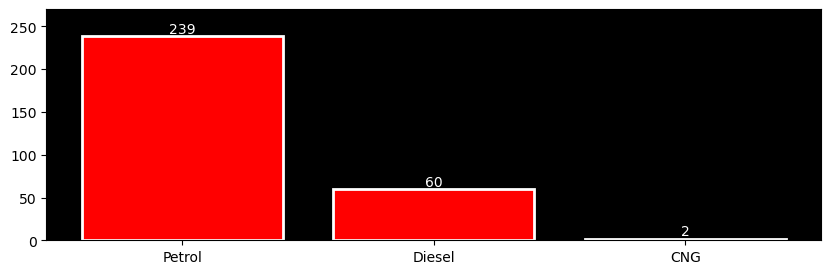

In [7]:
plt.figure(figsize=(10,3))
ax = plt.axes()
ax.set_facecolor('k')
x = data['Fuel_Type'].value_counts().keys()
y = data['Fuel_Type'].value_counts()
plot = plt.bar(x,y,color='r',ec='w',lw=2)
plt.bar_label(plot,labels=y,color='w')
plt.ylim(0,270)
plt.show()

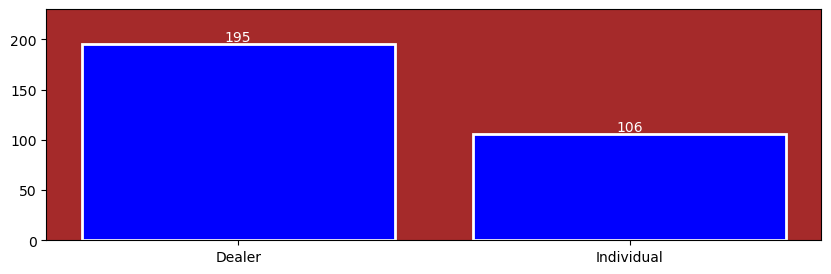

In [8]:
plt.figure(figsize=(10,3))
ax = plt.axes()
ax.set_facecolor('brown')
x = data['Seller_Type'].value_counts().keys()
y = data['Seller_Type'].value_counts()
plot = plt.bar(x,y,color='b',ec='w',lw=2)
plt.bar_label(plot,labels=y,color='w')
plt.ylim(0,230)
plt.show()

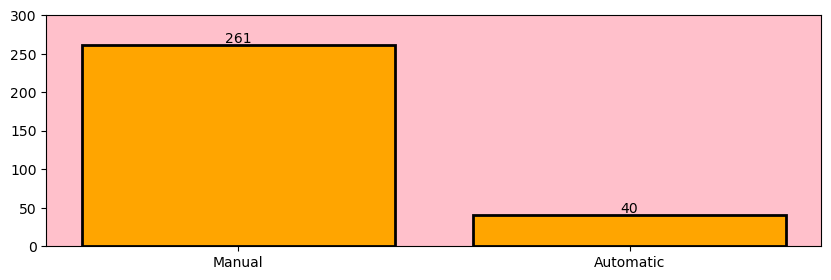

In [9]:
plt.figure(figsize=(10,3))
ax = plt.axes()
ax.set_facecolor('pink')
x = data['Transmission'].value_counts().keys()
y = data['Transmission'].value_counts()
plot = plt.bar(x,y,color='orange',ec='k',lw=2)
plt.bar_label(plot,labels=y,color='k')
plt.ylim(0,300)
plt.show()

In [10]:
# CHANGING CATEGORICAL DATA TO NUMERICAL
cat_to_num = pd.get_dummies(data[['Fuel_Type','Seller_Type','Transmission']])
cat_to_num

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0,0,1,1,0,0,1
1,0,1,0,1,0,0,1
2,0,0,1,1,0,0,1
3,0,0,1,1,0,0,1
4,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...
296,0,1,0,1,0,0,1
297,0,0,1,1,0,0,1
298,0,0,1,1,0,0,1
299,0,1,0,1,0,0,1


In [11]:
data.drop(columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'],axis = 1,inplace=True)
data = pd.concat([data,cat_to_num],axis=1)
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [12]:
# SEPARATING FEATURE AND TARGET VALUES
X = data.drop(['Selling_Price'],axis=1)
Y = data['Selling_Price']

In [13]:
# SPLITTING DATA TO TRAIN AND TEST
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [14]:
# CREATING LINEAR REGRESSION AND LASSO MODEL
LR = LinearRegression()
Lasso = Lasso()
RF = RandomForestRegressor()

In [15]:
# FITTING MODEL WITH TRAINING DATA
LR_model = LR.fit(x_train,y_train)
Lasso_model = Lasso.fit(x_train,y_train)
RF_model = RF.fit(x_train,y_train)

In [16]:
# PREDICTING VALUES ON TRAINING DATA AND TEST DATA
LR_x_train_pred = LR_model.predict(x_train)
LR_x_test_pred = LR_model.predict(x_test)
Lasso_x_train_pred = Lasso_model.predict(x_train)
Lasso_x_test_pred = Lasso_model.predict(x_test)
RF_x_train_pred = RF_model.predict(x_train)
RF_x_test_pred = RF_model.predict(x_test)

In [17]:
print('R squared error')
print(f'Linear Regression Train Data {round(r2_score(y_train,LR_x_train_pred)*100,2)}%')
print(f'Linear Regression Test Data {round(r2_score(y_test,LR_x_test_pred)*100,2)}%')
print(f'Lasso Regression Train Data {round(r2_score(y_train,Lasso_x_train_pred)*100,2)}%')
print(f'Lasso Regression Test Data {round(r2_score(y_test,Lasso_x_test_pred)*100,2)}%')
print(f'Random Forest Train Data {round(r2_score(y_train,RF_x_train_pred)*100,2)}%')
print(f'Random Forest Test Data {round(r2_score(y_test,RF_x_test_pred)*100,2)}%')

R squared error
Linear Regression Train Data 88.72%
Linear Regression Test Data 85.02%
Lasso Regression Train Data 84.36%
Lasso Regression Test Data 84.97%
Random Forest Train Data 98.62%
Random Forest Test Data 96.23%


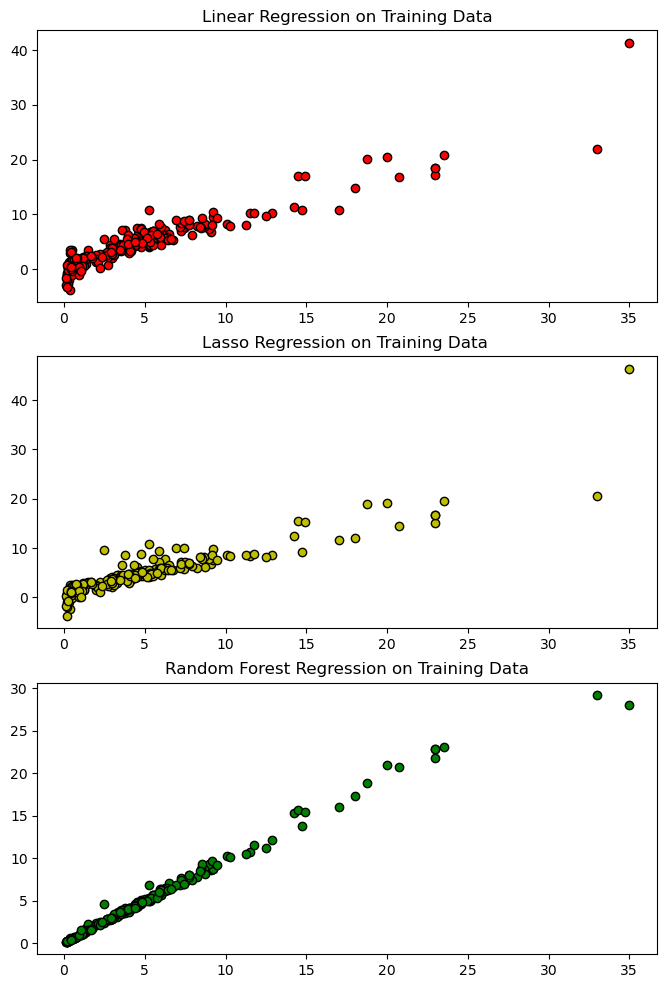

In [18]:
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.scatter(y_train,LR_x_train_pred,c='r',ec='k')
plt.title('Linear Regression on Training Data')
plt.subplot(3,1,2)
plt.scatter(y_train,Lasso_x_train_pred,c='y',ec='k',)
plt.title('Lasso Regression on Training Data ')
plt.subplot(3,1,3)
plt.scatter(y_train,RF_x_train_pred,c='g',ec='k')
plt.title('Random Forest Regression on Training Data')
plt.show()

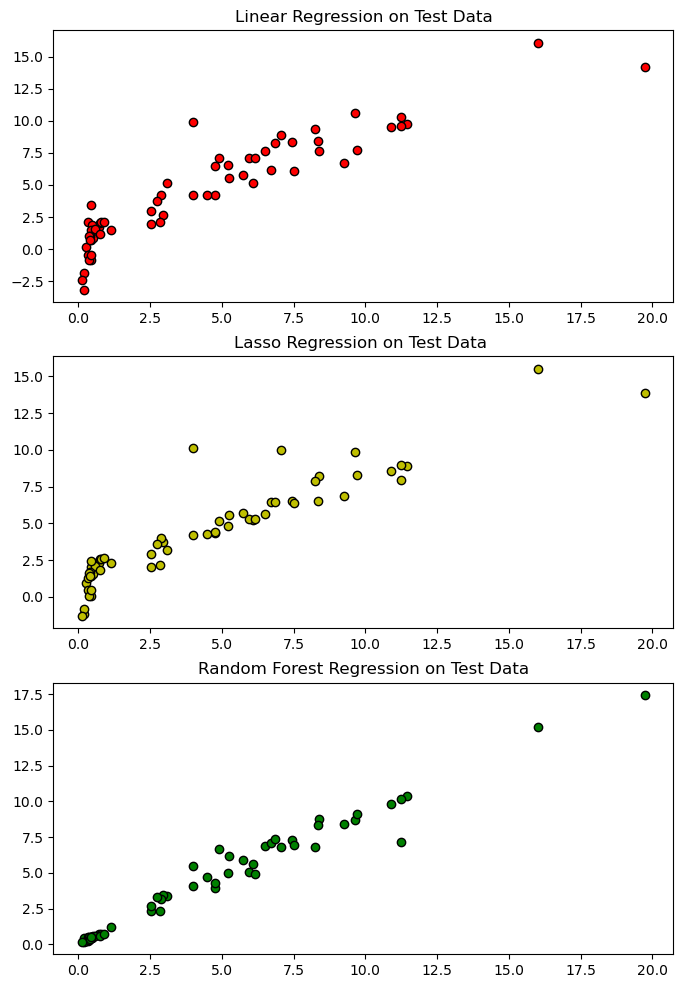

In [19]:
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.scatter(y_test,LR_x_test_pred,c='r',ec='k')
plt.title('Linear Regression on Test Data')
plt.subplot(3,1,2)
plt.scatter(y_test,Lasso_x_test_pred,c='y',ec='k',)
plt.title('Lasso Regression on Test Data ')
plt.subplot(3,1,3)
plt.scatter(y_test,RF_x_test_pred,c='g',ec='k')
plt.title('Random Forest Regression on Test Data')
plt.show()